## Project: Capstone DS Brainstation

## EDA and Feature Engineering

### Sprint 1: Sentiment Analysis for Mental Health

### Author: Gennaro Costantino

### Date: Aug 21, 2024


## Introduction:

In this notebook, we will be taking a look at the data we have prepared and cleaned for the Sentiment Analysis for Mental Health in the data cleaning. We will be attempting to draw insights and conclusions from the EDA to direct our feature engineering, feature selection and modelling.

Common Vocabulary in Text Analysis
When working with text data, we'll usually be dealing with many individual text files, each usually considered to be an individual data point (e.g. product reviews, documents, song lyrics, etc.)Ss some common language that we'll use.

Corpus: The entire data set or collection of text files. If working with product reviews, the corpus would be all of the individual reviews.

Document: One individual text file. If working with product reviews, a document would be one individual review.

Tokens: In processing the documents, we will break them into sequences of short strings called tokens. These could be the (processed) words/phrases from the original document, maybe pairs of consecutive words or even just parts of words.

Vocabulary: the collection of all unique words/tokens from the corpus.

The text : text data is:

Step 1: Convert text data into numeric data (the step that is unique to NLP)

Step 2: Feed numeric data irases are the tokens.

## Table of Contents
---
1. [Loading and Setup](#loadingandsetup)
2. [Data Assessment](#assessment)
3. [EDA](#eda)
4. [Feature Engineering (First Iteration)](#fa)
4. [Conclusions](#conclusions)

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [91]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv(r'C:\Users\User\Documents\Brain Station\Data Science\Capstone\capstone_social_listening_GC\data\Mental Health\Combined Data.csv',index_col=0)

## Data Assessment <a class="anchor" id="assessment"></a>

In [94]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [95]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [96]:
df['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

## EDA <a class="anchor" id="eda"></a>

### Sentiment Analysis
Sentiment analysis refers to the understanding of the mood of text. For example, if our company is suddenly trending on Twitter, we care a lot about if they are tweeting good things or bad things. Similarly, reviews of restaurants and movies often have a "sentiment" or star rating, that we can tie back to the text.

Most sentiment analysis models are built on the use of certain keywords - like good, great, bad, terrible - or a model based on known sentiments (e.g. a Yelp review, with a star rating) compared to an unknown text.

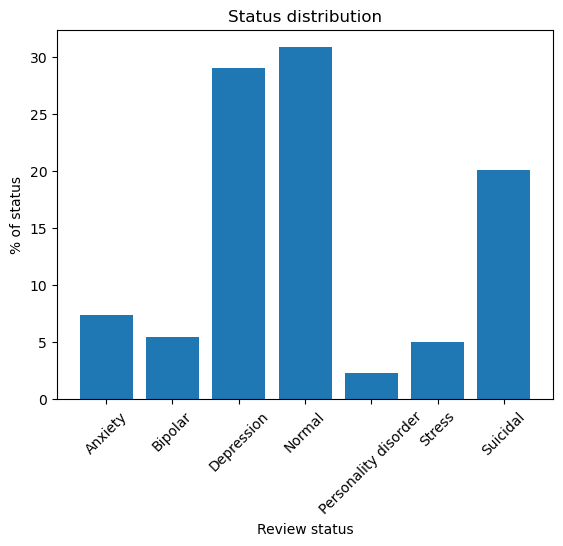

In [99]:
values, counts = np.unique(df['status'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Review status')
plt.ylabel('% of status',)
plt.title("Status distribution")
plt.xticks(rotation=45)
plt.show()

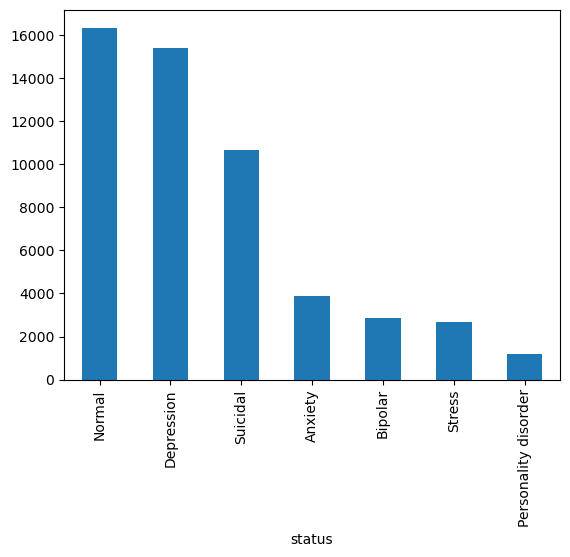

In [100]:
import matplotlib.pyplot as plt
df['status'].value_counts().plot(kind='bar')
plt.show()

Simplifying the Problem
Let's start with a simpler version of this problem to get an idea of how much information our data can give us.

We will create a new set of ratings where 'Anxiety', 'Bipolar', 'Depression', 'Personality disorder', 'Stress' and 'Suicidal' will count as 0 (bad), , and 'Normal' will count as 1 (good).

In [102]:
simple_data = df.copy()
simple_data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [103]:
condition = ['Normal']

simple_data['status'] = np.where(np.isin(simple_data['status'], conditions), 1, 0)

# Check the first few rows
simple_data.head()

,statement,status
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless hear...",0
2,"All wrong, back off dear, forward doubt. Stay ...",0
3,I've shifted my focus to something else but I'...,0
4,"I'm restless and restless, it's been a month n...",0


In [104]:
simple_data['status'].value_counts()

status
0    36692
1    16351
Name: count, dtype: int64

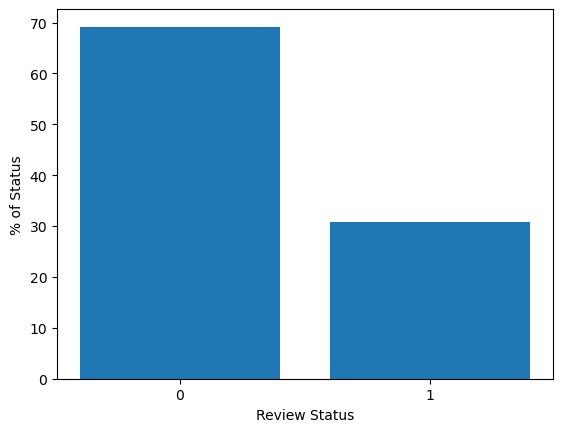

Class imbalance: [0.69 0.31]


In [105]:
values, counts = np.unique(simple_data['status'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Status')
plt.ylabel('% of Status')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [106]:
# store simplified data in X and y
X = simple_data['statement']
y = simple_data['status']

This is quite common if we're about to approach a serious problem (and sentiment analysis is very serious business). We first create a simpler representation and find out if we can even tell apart "good" from "bad."

## Text Data Exploration:

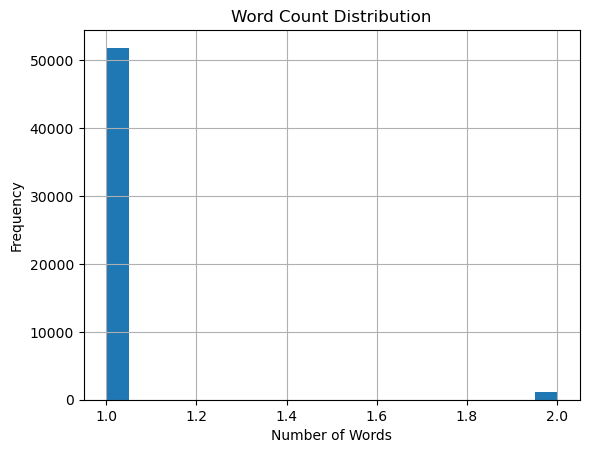

In [109]:
df['word_count'] = df['status'].apply(lambda x: len(x.split()))
df['word_count'].hist(bins=20)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [110]:
# Identify rows where the 'statement' column contains float values
float_values = df[df['statement'].apply(lambda x: isinstance(x, float))]

# Display the rows with float values
# print(float_values)

# Create a new column 'is_float' that is True if the value is a float
df['is_float'] = df['statement'].apply(lambda x: isinstance(x, float))
# Group by the 'is_float' column
grouped = df.groupby('is_float')

# Display the size of each group
print(grouped.size())

is_float
False    52681
True       362
dtype: int64


In [111]:
# Filter the rows where 'statement' is a float
float_values = df[df['statement'].apply(lambda x: isinstance(x, float))]

# Check if all the float values are NaN
all_nan = float_values['statement'].isna().all()

# Print the result
print("Are all float values NaN?:", all_nan)

Are all float values NaN?: True


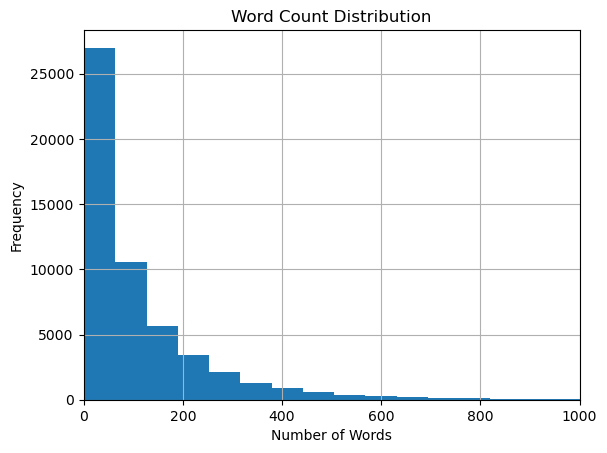

In [112]:
# To not count the attributeError: 'float' object has no attribute 'split', suggests that some of the entries in the statement column are not strings but float types. Which typically represent missing or null values.
# To fix it we will need to handle this issue by first converting all entries in the statement column to strings and then applying the split function.
# Filter the rows where 'statement' is a float
#float_values = df[df['statement'].apply(lambda x: isinstance(x, float))]

# Check if all the float values are NaN
#all_nan = float_values['statement'].isna().all()

# Print the result
#print("Are all float values NaN?:", all_nan)

# Convert all entries in the 'statement' column to strings
df['statement'] = df['statement'].astype(str)


# Now, calculate the word count
df['word_count'] = df['statement'].apply(lambda x: len(x.split()))

# Plot the word count distribution with more bins
df['word_count'].hist(bins=100)
plt.title('Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  
plt.show()

## Top Words in the Dataset:

In [114]:
from collections import Counter
from nltk.corpus import stopwords
import re

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# Apply cleaning and tokenizing
df['cleaned_text'] = df['statement'].apply(clean_text)

# Flatten list of lists into a single list of words
all_words = [word for sublist in df['cleaned_text'].tolist() for word in sublist]

# Get the most common words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)
print(most_common_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('like', 38493), ('feel', 31666), ('want', 27355), ('know', 23631), ('life', 22707), ('get', 21767), ('even', 18821), ('time', 18303), ('people', 16911), ('would', 16870), ('really', 16400), ('cannot', 15460), ('one', 14849), ('going', 13892), ('think', 13080), ('go', 12549), ('day', 11987), ('much', 11933), ('never', 11799), ('help', 10848)]


## Sentiment Distribution:

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


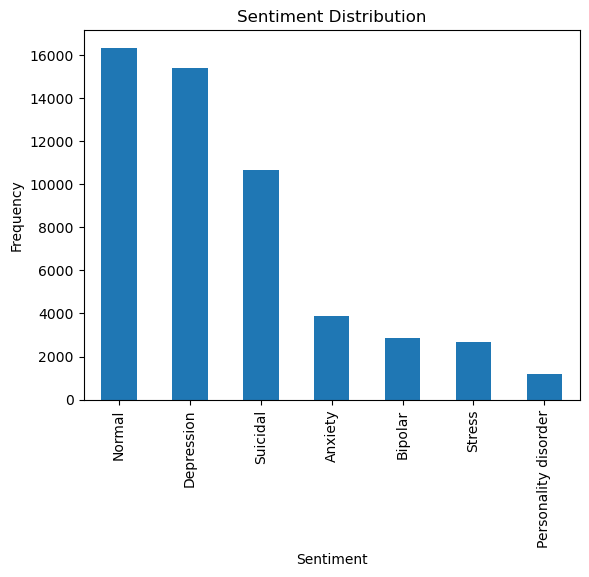

In [116]:
# Display the distribution of sentiment labels
print(df['status'].value_counts())

# Plot the sentiment distribution
df['status'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()
